# Machine Learning Models

# Helpful Package Imports & Methods

In [5]:
#heres all of the imports -- they are also in each of the individual sections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [6]:
def visualizeNA(df, plot = True):
    df = df.isnull().sum() / len(df)
    df = pd.DataFrame(df)
    df = df.reset_index()
    df.columns = ['index', 'ProportionNA']
    df = df[df['ProportionNA'] > 0]
    df = df.sort_values(by = "ProportionNA", ascending = False)
    df.head()
    if plot and len(df) > 0:
        sns.barplot(data = df, x = "ProportionNA", y = "index")
    return df

In [7]:
def dummify(df):
    
    df_objects = df.select_dtypes(include = "object")
    df_numeric = df.select_dtypes(exclude = "object")

    df_dummies = pd.get_dummies(df_objects, drop_first = True)

    df = pd.concat([df_numeric, df_dummies], axis = 1)
    return df

## Read and Clean Data

In [4]:
df3 = pd.read_csv("data/penguins_size.csv")
df3 = df3.dropna()
df3 = df3[df3['sex'] != "."]
df2 = dummify(df3)

# all of the code uses df = *dataframe* which will override df so we are going to call the original dataframe
# df3, and the dummified version df2

# Linear Regression

## How it works

Linear regression models the relationship between two variables by fitting a straight line to the data. One variable is the predictor (independent variable), and the other is the response (dependent variable). The goal is to find the best-fitting line that minimizes the distance between the observed values and the predicted values from the line, using the method of least squares, which minimizes the gap between each of the points and the line. This line allows you to predict the response variable for any given value of the predictor, and the slope of the line tells you how much the response changes for a unit increase in the predictor. 

## Code to implement

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import statsmodels.api as sm

In [6]:
df2.sample(1)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
107,38.2,20.0,190.0,3900.0,False,False,False,False,True


In [7]:
df = df2
X = df2[['body_mass_g']]
y = df2['culmen_depth_mm']

X Test: 100 X Train: 233
             Coefficient
body_mass_g    -0.001222
Y-Intercept:  22.36051841450448
Testing: MAE= 1.3110785626128743 , MSE= 2.639794628470177 , RMSE= 1.6247444809785252 R^2 0.22520207847782137
Train: MAE= 1.4714877267767856 , MSE= 3.1698753929782066 , RMSE= 1.7804143879946057 R^2 0.21756812597761666


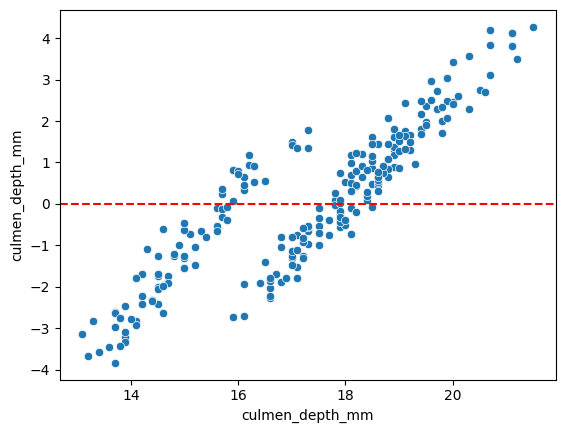

In [8]:
## Model Params ##
plot_residuals = True
p_vals = True
test_size = 0.3
random_state = 100
## ------------ ##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print("X Test:", len(X_test), "X Train:", len(X_train))
model = LinearRegression()  #model could be named anything
model.fit(X_train,y_train)
y_intercept = model.intercept_
test_predictions = model.predict(X_test)
test_predictions
train_predictions = model.predict(X_train)
equation = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(equation)
print("Y-Intercept: ", y_intercept)
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
RMSE = np.sqrt(MSE)
print('Testing: MAE=', MAE, ', MSE=', MSE, ', RMSE=', RMSE, 'R^2', r2)
MAE_train = mean_absolute_error(y_train, train_predictions)
MSE_train = mean_squared_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)
RMSE_train = np.sqrt(MSE_train)
print('Train: MAE=', MAE_train, ', MSE=', MSE_train, ', RMSE=', RMSE_train, 'R^2', r2_train)
if plot_residuals:
    # Make a plot of y_train vs. train residuals.
    train_residuals = y_train - train_predictions
    sns.scatterplot(x=y_train, y=train_residuals)
    plt.axhline(y=0, color='r', linestyle='--')
if p_vals:
    X2_train = sm.add_constant(X_train)
    model_sm2 = sm.OLS(y_train,X2_train)
    fitted_model_sm2 = model_sm2.fit()
    summary = fitted_model_sm2.summary2()
    p_value_table = summary.tables[1]
    p_values = pd.DataFrame(p_value_table)
    p_values = p_values.sort_values(by='P>|t|')

## Accuracy Metrics

${culmen\_depth} = -0.001222 \times {body\_mass\_g} + 22.3605$

This means for every gram increase in body mass we can expect the culmen dept to decrease by .0012


The metrics are in the code above -- in this case we should probably use R^2, RMSE and MAE. We want to be close to the actual values so minimizing each of these three is important. In the case of our very simple linear regression, body mass is not a good predictor of culmen depth.

## Graphics

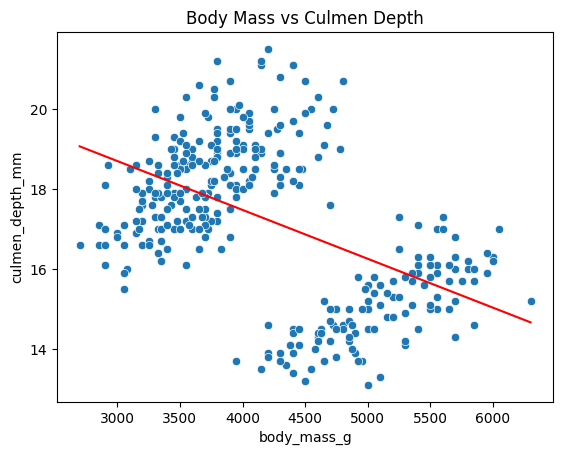

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
y_pred = model.predict(X)
sns.scatterplot(data=df, x='body_mass_g', y='culmen_depth_mm')
sns.lineplot(x=df['body_mass_g'], y=y_pred, color='red')
plt.title("Body Mass vs Culmen Depth")
plt.show()

This graph is pretty terrible. In this case with these two variables single regression is a poor choice. 

# Multiple Regression

Provide an example from the penguins data predicting mass of penguins. Include 
at least 2 numeric predictors and at least one categorical predictor (such as island, 
species, or gender). 


o Include the regression line equation with appropriate formatting and a clear 
interpretation of the various model coefficients.


o Although you likely cannot plot all of the variables you included on a single 
graph, provide one or more visualizations that show the relationships between 
mass and the other variables you chose.

## How it works

Multiple regression uses more than one predictor variable to explain the change in a single response variable. The goal is to model how multiple factors influence the outcome simultaneously. The algorithm fits a plane or hyperplane to the data that best captures the relationship between the predictors and the response. Each predictor gets a coefficient that quantifies its impact on the response, controlling for the other variables. Each of the variables has a p-value, which quantifies how useful it is in predicting the predictor. 

## Code to implement

In [10]:
df2.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_MALE'],
      dtype='object')

X Test: 100 X Train: 233
                  Coefficient
island_Dream      -831.620131
island_Torgersen  -496.842840
culmen_depth_mm    -22.159601
culmen_length_mm    69.140998
Y-Intercept:  1942.3347695160996
Testing: MAE= 399.2109269524946 , MSE= 252342.91624613598 , RMSE= 502.337452561658 R^2 0.6755088231400967
Train: MAE= 397.00480229736274 , MSE= 240787.50633655692 , RMSE= 490.7010355975998 R^2 0.5918909656624785


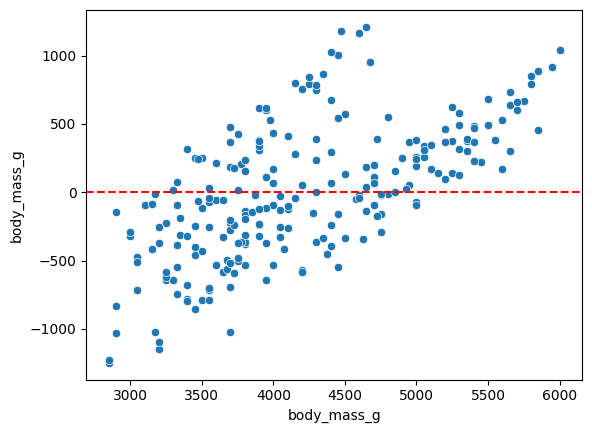

In [11]:
## Dataframe and X, Y Setting ##
df = df2
X = df2[['island_Dream','island_Torgersen', 'culmen_depth_mm', 'culmen_length_mm']]
y = df2['body_mass_g']
y = y.astype(float)
X = X.astype(float)
## -------------------------- ##

## Model Params ##
plot_residuals = True
p_vals = True
test_size = 0.3
random_state = 100
## ------------ ##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print("X Test:", len(X_test), "X Train:", len(X_train))
model = LinearRegression()  #model could be named anything
model.fit(X_train,y_train)
y_intercept = model.intercept_
test_predictions = model.predict(X_test)
test_predictions
train_predictions = model.predict(X_train)
equation = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(equation)
print("Y-Intercept: ", y_intercept)
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
RMSE = np.sqrt(MSE)
print('Testing: MAE=', MAE, ', MSE=', MSE, ', RMSE=', RMSE, 'R^2', r2)
MAE_train = mean_absolute_error(y_train, train_predictions)
MSE_train = mean_squared_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)
RMSE_train = np.sqrt(MSE_train)
print('Train: MAE=', MAE_train, ', MSE=', MSE_train, ', RMSE=', RMSE_train, 'R^2', r2_train)
if plot_residuals:
    # Make a plot of y_train vs. train residuals.
    train_residuals = y_train - train_predictions
    sns.scatterplot(x=y_train, y=train_residuals)
    plt.axhline(y=0, color='r', linestyle='--')
if p_vals:
    X2_train = sm.add_constant(X_train)
    model_sm2 = sm.OLS(y_train,X2_train)
    fitted_model_sm2 = model_sm2.fit()
    summary = fitted_model_sm2.summary2()
    p_value_table = summary.tables[1]
    p_values = pd.DataFrame(p_value_table)
    p_values = p_values.sort_values(by='P>|t|')

## Accuracy Metrics

${body\_mass\_g} = -831.6201 \times {island\_Dream} - 496.8428 \times {island\_Torgersen} - 22.1596 \times {culmen\_depth\_mm} + 69.1410 \times {culmen\_length\_mm} + 1942.3348$


This equation for body mass is much better with multiple predictors. In this case we can see that body mass decreases when the penguins are on Dream or Torgersen islands and when their culmen depth increases. However when the culmen length increases this can be expected to produce an increase in body mass. Since I am not an expert on penguins, this is all the more interpretation I can gather from this equation, I am unsure why culmen depth and length would not both be related to an increase or decrease in body mass.

Our R^2 is now .59 for the train data which means we can explain 59% of our varaition in body_mass_g with the specified predictors. Using R^2, adjusted R^2 (which accounts for the number of predictors), RMSE or MAE would all be appropriate measures of model accuracy

## Graphics

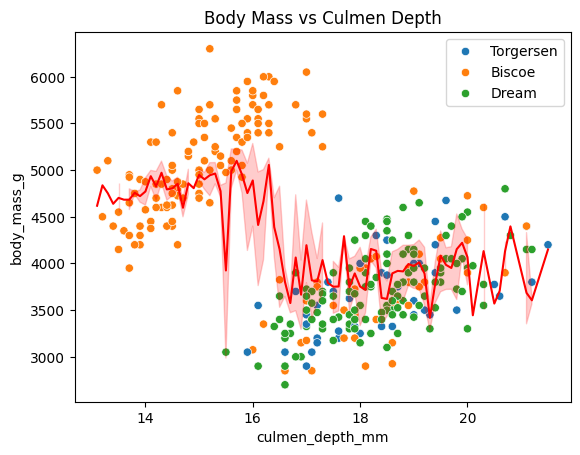

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
y_pred = model.predict(X)
sns.scatterplot(data=df3, x='culmen_depth_mm', y='body_mass_g', hue = 'island')
sns.lineplot(x=df3['culmen_depth_mm'], y=y_pred, color='red')
plt.title("Body Mass vs Culmen Depth")
plt.show()

This graph is certainly an improvement. We can see that the data is not linear (i.e. island and other things influence the body mass of the penguins) but our multiple regression takes this into account. I would use this as an initial graph that is easy to explain before moving onto more complex models.

# Polynomial Regression

Provide an example from penguins data where both the input and output are 
numeric. Include a plot of the two variables you choose. (Hint: A pairs plot 
might help you to choose a relationship with a more curved / polynomial shape.)


o Include well-commented code for a loop that tests degree 1 through 10 
polynomials, finding both testing and training RMSE for each degree and plotting 
the results.


o Clearly indicate which polynomial would make sense for the input and output you 
chose and provide the equation for this polynomial (nicely formatted). Explain to 
the reader how to interpret your test / train RMSE plot. Note: If you prefer an 
R^2 test/train plot, you are welcome to include one of those as well

## How it works

Polynomial regression is very similar to linear regression, but it fits variable in multiple dimensions. It will add a variable squared or cubed to the regression. This allows for a better fit when the data is clearly non-linear. Polynomial regression can overfit though, again if we keep adding many degrees we could get a very accurate 12th degree model that overfits our simple cubic relationship. It is a good next step when you determine you do not have a linear relationship between variables. 

## Code to implement

In [13]:
from sklearn.preprocessing import PolynomialFeatures

## Dataframe and X, Y Setting ##
df = df3
X = df[['flipper_length_mm']]
y= df['culmen_length_mm']
y = y.astype(float)
X = X.astype(float)
## -------------------------- ##

## Model Params ##
test_size = 0.3
random_state = 100
## ------------ ##



RMSEtrain = []
RMSEtest = []
Rsqtest = []
Rsqtrain = []


# d refers to the degree of the polynomial
for degree in range(1,10):

    # First build the polynomial converter with degree d
    polynomial_converter = PolynomialFeatures(degree=degree,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=test_size, random_state = random_state)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)

# Then build the polynomial features for X before you split into train and test
    MSE_test = mean_squared_error(y_test, test_predictions)
    RMSE_test = np.sqrt(MSE_test)
    MSE_train = mean_squared_error(y_train, train_predictions)
    RMSE_train = np.sqrt(MSE_train)
    RSQ_test = r2_score(y_test, test_predictions)
    RSQ_train = r2_score(y_train, train_predictions)
    RMSEtrain.append(RMSE_train)
    Rsqtest.append(RSQ_test)
    Rsqtrain.append(RSQ_train)
    RMSEtest.append(RMSE_test)



intercept= 42846.788698688964
   Coefficient
0  -849.161565
1     6.297389
2    -0.020696
3     0.000025
Testing: MAE= 3.242151720396883 , MSE= 17.893913745620072 , RMSE= 4.230119826390273 R^2 0.4590218816448791
Train: MAE= 3.1554042203667376 , MSE= 15.967465440638135 , RMSE= 3.9959311105971453 R^2 0.4361464007644771


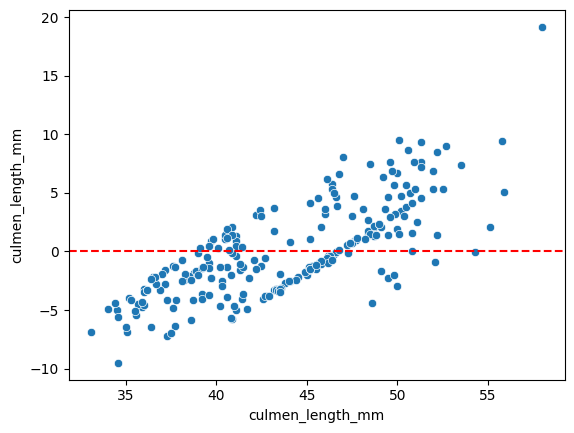

In [14]:
from sklearn.preprocessing import PolynomialFeatures

## Dataframe and X, Y Setting ##
df = df3
X = df[['flipper_length_mm']]
y= df['culmen_length_mm']
y = y.astype(float)
X = X.astype(float)
## -------------------------- ##

## Model Params ##
test_size = 0.3
random_state = 100
degree = 4
## ------------ ##


polynomial_converter = PolynomialFeatures(degree=degree,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=test_size, random_state = random_state)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)
print('intercept=', model.intercept_)
print(pd.DataFrame(model.coef_, columns=['Coefficient']))
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
RMSE = np.sqrt(MSE)
print('Testing: MAE=', MAE, ', MSE=', MSE, ', RMSE=', RMSE, 'R^2', r2)
MAE_train = mean_absolute_error(y_train, train_predictions)
MSE_train = mean_squared_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)
RMSE_train = np.sqrt(MSE_train)
print('Train: MAE=', MAE_train, ', MSE=', MSE_train, ', RMSE=', RMSE_train, 'R^2', r2_train)
if plot_residuals:
    # Make a plot of y_train vs. train residuals.
    train_residuals = y_train - train_predictions
    sns.scatterplot(x=y_train, y=train_residuals)
    plt.axhline(y=0, color='r', linestyle='--')
if p_vals:
    X2_train = sm.add_constant(X_train)
    model_sm2 = sm.OLS(y_train,X2_train)
    fitted_model_sm2 = model_sm2.fit()
    summary = fitted_model_sm2.summary2()
    p_value_table = summary.tables[1]
    p_values = pd.DataFrame(p_value_table)
    p_values = p_values.sort_values(by='P>|t|')


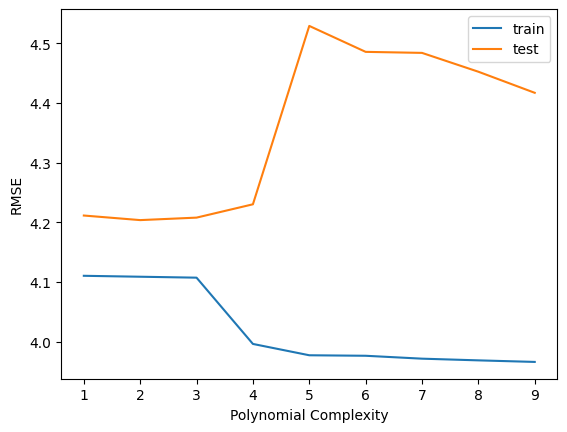

In [15]:
plt.plot(range(1,10), RMSEtrain, label='train')
plt.plot(range(1,10), RMSEtest, label='test')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

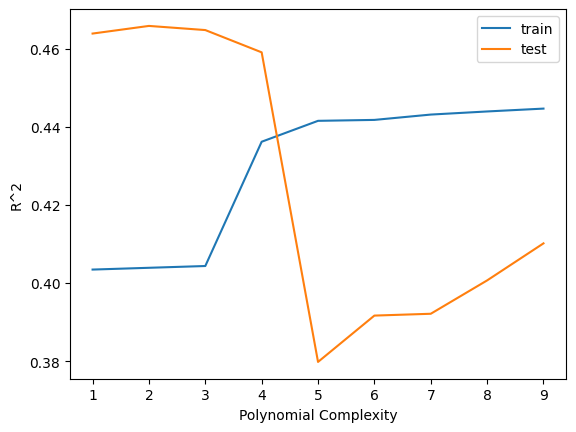

In [16]:
plt.plot(range(1,10), Rsqtrain, label='train')
plt.plot(range(1,10), Rsqtest, label='test')
plt.xlabel("Polynomial Complexity")
plt.ylabel("R^2")
plt.legend()

## Accuracy Metrics

${culmen\_length} = -849.1616 \times {flipper\_length} + 6.2974 \times {flipper\_length^2} - 0.0207 \times {flipper\_length^3} + 0.000025 \times {flipper\_length^4} + 42846.7887$


The large coefficients for flipper length and flipper length squared show that we probably have more of a linear relationship between flipper and culmen length. In this case a polynomial model is probably not appropriate, even if the r^2 and RMSE are decent. 

Using both R^2 and RMSE is appropriate for polynomial models. In this case we do not have a great model, and anything more than a 4th degree polynomial is clearly overfitting the data (drop in R^2 and rise in RMSE).

## Graphics

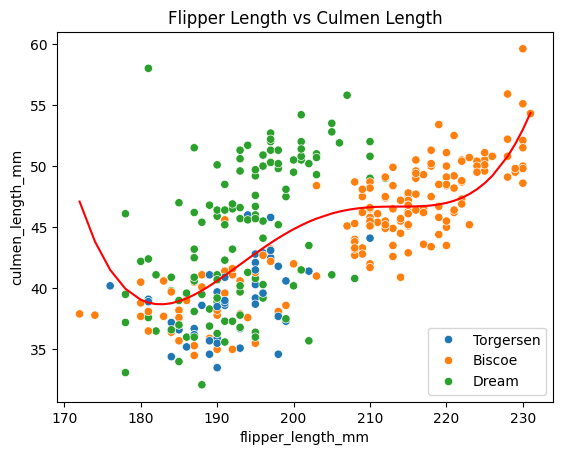

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
y_pred = model.predict(poly_features)
sns.scatterplot(data=df3, x='flipper_length_mm', y='culmen_length_mm', hue = 'island')
sns.lineplot(x=df3['flipper_length_mm'], y=y_pred, color='red')
plt.title("Flipper Length vs Culmen Length")
plt.show()

For flipper and culmen length and depth I think it makes more sense to use a linear model than a polynomial one. 

# Logistic Regression

Logistic regression (classification)
o This one will require two examples: how to make predictions for a binary 
classifier (male/female) and how to make predictions when there are more than 2 
classes. 


o First, demonstrate how to predict gender from two numeric predictors. 


▪ Be sure to tell the reader if there are any requirements about what the 
output data looks like (i.e. Should it be words, floats, true/false, etc.). 


▪ Include the logistic regression equation for odds, appropriately formatted, 
and a clear interpretation of the model coefficients as they impact gender.


▪ Then include one or more plots that highlight the relationships between 
gender and your predictor variables.


o Second, demonstrate how to predict either species or island. You can use any 
predictors that make sense in this model. Walk the reader through how you will 
deal with having 3 output categories when you are doing logistic regression

## How it works

Logistic regression is used for classification tasks when the outcome is categorical. Instead of predicting a continuous value, logistic regression predicts the probability of an event occurring, such as the likelihood of a penguin being a certain species, or a specific gender. The model uses the logistic function to map the linear combination of inputs to a value between 0 and 1, which represents this probability. A threshold is then applied to classify observations into one of the two categories. Depending on whether you want more more false-positives or false-negatives you can adjust the threshold to predict. An example is if you are trying to predict a rare form of cancer you might want more false-positives on the first test (i.e. tell more people they have the cancer so they get additional screening).

In this case the output data should be dummified

## Code to implement

In [18]:
#This is not linear regression, so use LogisticRegression()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = df2

X=df[['flipper_length_mm','body_mass_g']]#,'species_Chinstrap','species_Gentoo']]
y= df['sex_MALE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print('intercept=', log_model.intercept_)
print(f"Coefficient: {log_model.coef_}")
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = log_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(df['sex_MALE'].value_counts() / len(df))
print(confusion_matrix(y_test,y_pred))

intercept= [9.37501822]
Coefficient: [[-0.1119961   0.00312288]]
Accuracy: 0.66
sex_MALE
True     0.504505
False    0.495495
Name: count, dtype: float64
[[37 14]
 [20 29]]


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = df3

X=df[['flipper_length_mm','body_mass_g']]#,'species_Chinstrap','species_Gentoo']]
y= df['island']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print('intercept=', log_model.intercept_)
print(f"Coefficient: {log_model.coef_}")
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = log_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(df['island'].value_counts() / len(df))
print(confusion_matrix(y_test,y_pred))

intercept= [-10.18279228   6.96294853   3.21984375]
Coefficient: [[ 0.03308536  0.0010042 ]
 [-0.02629267 -0.00037656]
 [-0.00679269 -0.00062765]]
Accuracy: 0.64
island
Biscoe       0.489489
Dream        0.369369
Torgersen    0.141141
Name: count, dtype: float64
[[34  8  0]
 [13 30  0]
 [ 5 10  0]]


C:\Users\coleo\PycharmProjects\ds401\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Accuracy Metrics

${log\_odds(male)} = 9.3750 - 0.1120 \times {flipper\_length} + 0.0031 \times {body\_mass}$


The log odds of a penguin being male increase slightly with body mass (.0031) and decrease with flipper length (.112). 

${log\_odds(island\_Biscoe)} = -10.1828 + 0.0331 \times {flipper\_length} + 0.0010 \times {body\_mass}$

${log\_odds(island\_Dream)} = 6.9629 - 0.0263 \times {flipper\_length} - 0.0004 \times {body\_mass}$

${log\_odds(island\_Torgersen)} = 3.2198 - 0.0068 \times {flipper\_length} - 0.0006 \times {body\_mass}$


In the case of logistic regression with multiple islands we get equations for all three of the islands as outputs from our logistic model. We can see that flipper length increases the chance of being on Biscoe, while it decreases the chance of being on islands Dream and Torgersen. Judging by these coefficients we would expect the biggest penguins on island Biscoe and the smallest generally on islands Dream and Torgersen. 

In this case we do not use R^2 RMSE or any metrics like that. Because we are making a logistic model and predicting a category we can compare the accuracy of our model to the accuracy of just predicting the default value. In this case our model is 66% accurate vs a 50/50 split of the sex of penguins. We can also build a confusion matrix to show whether the model usually over or under predicts the true positive. In this case we can see that there is roughly an even split between falsely predicting male and falsely predicting female. 

## Graphics

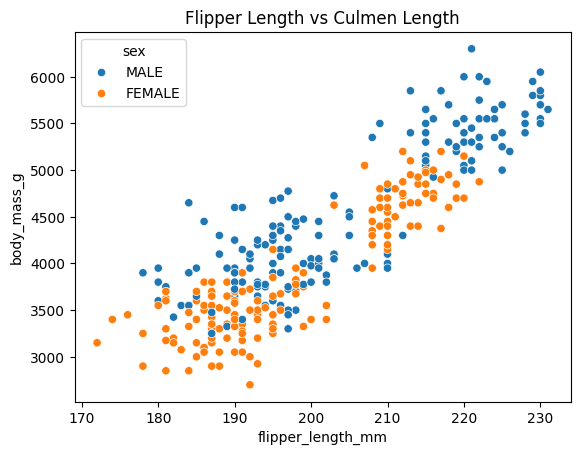

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# y_pred = log_model.predict(X)
sns.scatterplot(data=df3, x='flipper_length_mm', y='body_mass_g', hue = 'sex')
# sns.lineplot(x=df3['flipper_length_mm'], y=y_pred, color='red')
plt.title("Flipper Length vs Culmen Length")
plt.show()

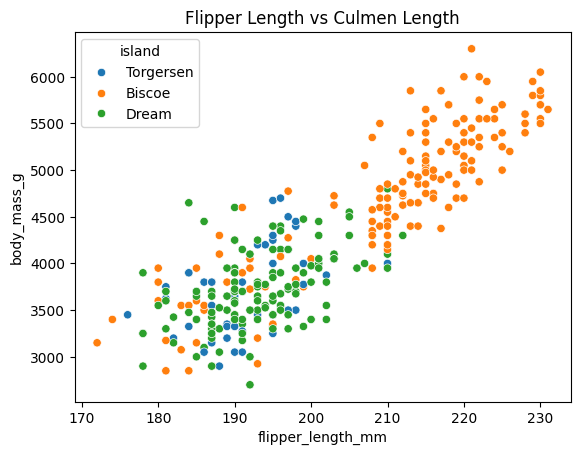

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# y_pred = log_model.predict(X)
sns.scatterplot(data=df3, x='flipper_length_mm', y='body_mass_g', hue = 'island')
# sns.lineplot(x=df3['flipper_length_mm'], y=y_pred, color='red')
plt.title("Flipper Length vs Culmen Length")
plt.show()

Both of these graphs show more of a cluster relationship between body mass flipper length and both island and sex of the penguin. It looks like both will do much better in a KNN or Support Vector model. 

# K Nearest Neighbors

In your general explanation of how KNN works, be sure to describe 3 different 
common metrics used in KNN as well as listing some of the limitations of KNN. 


Also include an explanation of why there won’t be a formula provided for the 
final model (as there was in the above linear and logistic regression tasks).


o This topic will require two examples: one for classification and one for 
regression.


o For the classification example, build a model to predict species using 2 numeric 
predictors. Include a scatterplot with both numeric predictors, color coded by 
species.


o For the regression example, clearly identify which of the 4 numeric outputs you 
would like to predict and include at least 2 numeric predictors and 1 categorical 
predictor in your model. Again include visuals with your output variable color 
coded (this time it should be a color gradient, since it isn’t categorical

## How it works

KNN is a simple algorithm that can be used for both classification and regression. When a new data point is plotted, the algorithm looks at the k closest data points (neighbors) in the feature space and makes a prediction based on their values. For classification, it assigns the new point to the class that appears most frequently among its neighbors, while for regression, it averages the values of the nearest neighbors. The algorithm's performance can suffer with large datasets, as calculating distances between all points becomes computationally expensive. For large datasets it is probably better to use support vector machines, which work on a similar concept. KNN commonly is evaluated based on accuracy, MSE, and F-1 score. When creating a KNN model you control K neighbors and the algorithm does the rest, essentially brute forcing a result for each data point. 

## Code to implement

### KNN for classification

100%|██████████| 29/29 [00:00<00:00, 49.82it/s]


<Axes: title={'center': 'Elbow Plot'}, xlabel='Num Neighbors', ylabel='Accuracy Rate'>

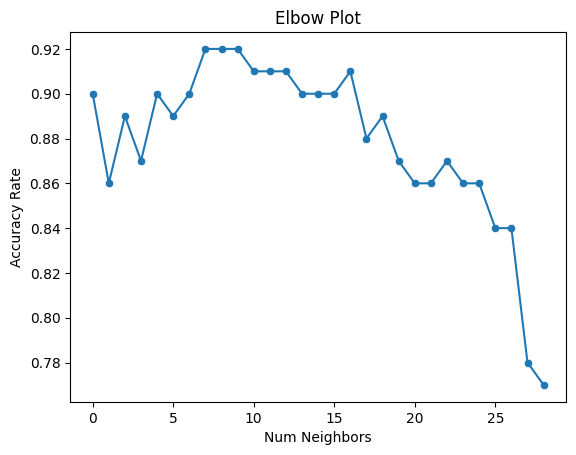

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tqdm import tqdm

# first see what the most accurate number of neighbors is --- 


df = df2
predictor = 'sex_MALE' 
cols = df.columns
other_removes = ''
to_be_removed = {predictor, other_removes}
cols = [item for item in cols if item not in to_be_removed]
X = df[cols]
y = df[predictor]
    
test_error = []
for neighbors in tqdm(range(1,30)):
   

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    knn_model = KNeighborsClassifier(n_neighbors = neighbors)
    knn_model.fit(scaled_X_train, y_train)

    y_pred = knn_model.predict(scaled_X_test)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    test_error.append(accuracy)

sns.scatterplot(test_error)
plt.ylabel('Accuracy Rate')
plt.title("Elbow Plot")
plt.xlabel('Num Neighbors')
sns.lineplot(test_error)

In [23]:
neighbors = 8
df = df2
predictor = 'sex_MALE' 
cols = df.columns
other_removes = ''
to_be_removed = {predictor, other_removes}
cols = [item for item in cols if item not in to_be_removed]
X = df[cols]
y = df[predictor]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors = neighbors)
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)

# y_intercept = knn_model.intercept_
test_predictions = knn_model.predict(scaled_X_test)
# test_predictions
train_predictions = knn_model.predict(scaled_X_train)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"confusion_matrix: {confusion}")
print(f"classification table: {classification}")

print(df[predictor].value_counts() / len(df))

Accuracy: 0.92
confusion_matrix: [[45  3]
 [ 5 47]]
classification table:               precision    recall  f1-score   support

       False       0.90      0.94      0.92        48
        True       0.94      0.90      0.92        52

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

sex_MALE
True     0.504505
False    0.495495
Name: count, dtype: float64


### Now KNN for a numeric variable

<Axes: title={'center': 'Elbow Plot'}, xlabel='Num Neighbors', ylabel='RMSE'>

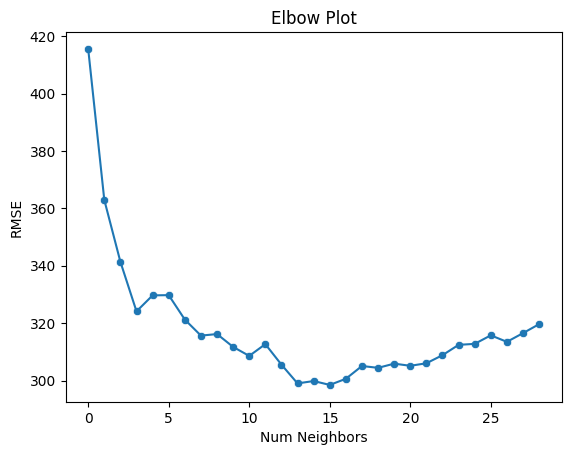

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


df = df2


predictor = 'body_mass_g' 
other_removes = ''
cols = df.columns
to_be_removed = {predictor, other_removes}
cols = [item for item in cols if item not in to_be_removed]
X = df[cols]
y = df[predictor]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

test_error = []
for n in range(1,30):
    # 'chebyshev', 'manhattan', 'euclidian', 'minkowski'
    knn_model = KNeighborsRegressor(n_neighbors = n, metric = 'minkowski')
    knn_model.fit(scaled_X_train, y_train)
    y_pred = knn_model.predict(scaled_X_test)
    test_predictions = knn_model.predict(scaled_X_test)
    train_predictions = knn_model.predict(scaled_X_train)
    MAE = mean_absolute_error(y_test, test_predictions)
    MSE = mean_squared_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)
    RMSE = np.sqrt(MSE)
    test_error.append(RMSE)

sns.scatterplot(test_error)
plt.ylabel('RMSE')
plt.title("Elbow Plot")
plt.xlabel('Num Neighbors')
sns.lineplot(test_error)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


df = df2

neighbors = 13
predictor = 'body_mass_g' 
other_removes = ''
cols = df.columns
to_be_removed = {predictor, other_removes}
cols = [item for item in cols if item not in to_be_removed]
X = df[cols]
y = df[predictor]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 'chebyshev', 'manhattan', 'euclidian', 'minkowski'
knn_model_regress = KNeighborsRegressor(n_neighbors = neighbors, metric = 'minkowski')
knn_model_regress.fit(scaled_X_train, y_train)


y_pred = knn_model_regress.predict(scaled_X_test)

# y_intercept = knn_model.intercept_
test_predictions = knn_model_regress.predict(scaled_X_test)
# test_predictions
train_predictions = knn_model_regress.predict(scaled_X_train)
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
RMSE = np.sqrt(MSE)
print('Testing: MAE=', MAE, ', MSE=', MSE, ', RMSE=', RMSE, 'R^2', r2)
MAE_train = mean_absolute_error(y_train, train_predictions)
MSE_train = mean_squared_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)
RMSE_train = np.sqrt(MSE_train)
print('Train: MAE=', MAE_train, ', MSE=', MSE_train, ', RMSE=', RMSE_train, 'R^2', r2_train)

Testing: MAE= 229.0183696900115 , MSE= 93370.95955135566 , RMSE= 305.56662047965193 R^2 0.8726088393821085
Train: MAE= 223.51069982648932 , MSE= 75958.09049250346 , RMSE= 275.60495367918094 R^2 0.8781869468227257


## Accuracy Metrics

In this case both KNN for Regression and classification produced some very good models. KNN does not return an equation since it is just lazily predicting a classification or numeric value based on close neighbors. 

For classification we can use all of the same metrics as logistic regression -- Accuracy, F-1 scores, confusion matrices. 

For regression we can use the same metrics as polynomial, linear, multiple regression -- RMSE, R^2, MAE etc. 

The classification KNN model is 92% accurate, which is a significant improvement on the baseline (50.5%). Meanwhile the regression has an R^2 value of .878 for the training and .873 for the testing predictions, which are both great scores for a regression model

## Graphics

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

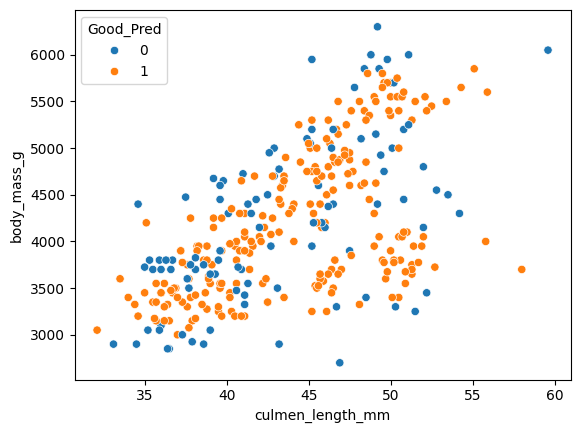

In [26]:
predictions = knn_model_regress.predict(scaler.fit_transform(X))
buffer = 300
df['Predicted'] = predictions
df['Good_Pred'] = np.where(df['Predicted'] >= df[predictor] - buffer, np.where(df['Predicted'] <= df[predictor] + buffer, 1, 0),0)

sns.scatterplot(df, x = 'culmen_length_mm', y = predictor, hue = 'Good_Pred')

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

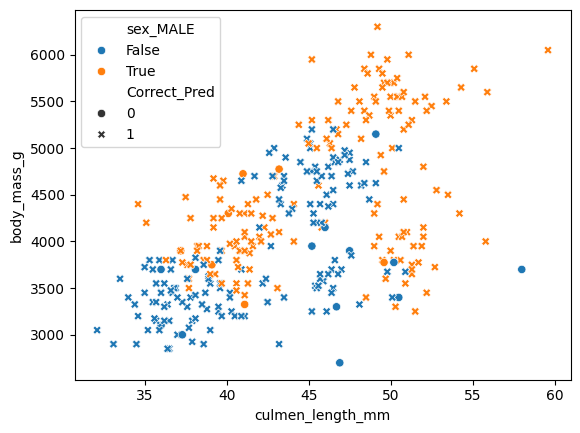

In [27]:
neighbors = 8
df = df2
predictor = 'sex_MALE' 
cols = df.columns
other_removes = ''
to_be_removed = {predictor, other_removes}
cols = [item for item in cols if item not in to_be_removed]
X = df[cols]
y = df[predictor]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors = neighbors)
knn_model.fit(scaled_X_train, y_train)
predictions = knn_model.predict(scaler.fit_transform(X))
df['Predicted'] = predictions
df['Correct_Pred'] = np.where(df['Predicted'] == df[predictor], 1, 0)

sns.scatterplot(df, x = 'culmen_length_mm', y = 'body_mass_g', style = 'Correct_Pred', hue = predictor)

For the first plot (regression KNN) we have to get a bit creative to get a meaningful output. In this case we can graph our predicted value (body mass) vs one of our input values. Then we can highlight points based on if our model was within a buffer zone of the right prediction. Even though KNN is doing regression it does not return a regression line so we have nothing to plot. If we plot whether a prediction was within 10% of the right value for a certain point then we can see where the KNN is most accurate

The second plot is much easier to interpret. For classification of gender we get a yes/no from the model that we can then compare to the actual yes/no. The correct predictions are plotted here as X's and the incorrect are plotted as O's. We could also highlight correctness based on color which is easier to interpret, but in the case of this model we only have a handful of incorrect points so they do stick out as a shape. 

# Support Vector Machines

This one will also require two examples… 

o For the first example, predict gender using two numeric predictors. This example 
is intentionally 2-D so that you can show off visualizations using 
plot_svm_boundary. Use this example to demonstrate several kernel options with 
various hyperparameters. (Include a minimum of 6 graphs and explain what 
gamma and C do to the hyperplanes. This works best by holding all 
hyperparameters steady except the one you are unpacking for the reader.) 


o For the second example, predict species using as many of the other variables as 
you like. Be sure to indicate to the reader if there are any restrictions on the 
formatting for ‘species’ (i.e. floats, strings, true/false, etc.)


o In the support vector machines section we also learned about grid searching to 
evaluate which hyperparameters would work best. Choose one of your examples 
to demonstrate grid searching. You can use either the sklearn grid search 
command (which includes cross validation) or your own for loops, or both

## How it works

Support Vector Machines are primarily used for classification tasks but can also be applied to regression. The main idea is to find the line, plane or hyperplane that best separates data points from different classes, with the widest possible margin between the nearest points of each class (called support vectors). This maximizes the model’s ability to classify new data correctly. Basically, support vector machines try to separate groups of similar types with a plane or line of some kind and then when additional points are added they are classified based on which side of the line they fall on. 

## Code to implement

In [12]:
from sklearn.svm import SVC
import pandas as pd
from svm_margin_plot import plot_svm_boundary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
df3 = pd.read_csv("data/penguins_size.csv")
df3 = df3.dropna()
df3 = df3[df3['sex'] != "."]
df2 = dummify(df3)
df = df2
X = df[['body_mass_g', 'flipper_length_mm']]
y = df['sex_MALE']
# all of the code uses df = *dataframe* which will override df so we are going to call the original dataframe
# df3, and the dummified version df2


Accuracy Score:  0.269
              precision    recall  f1-score   support

       False       0.26      0.38      0.31        29
        True       0.28      0.18      0.22        38

    accuracy                           0.27        67
   macro avg       0.27      0.28      0.27        67
weighted avg       0.27      0.27      0.26        67


C:\Users\coleo\PycharmProjects\ds401\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


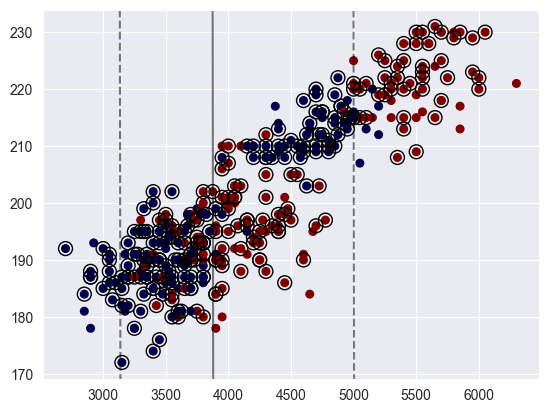

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

model = SVC(kernel='sigmoid', C = 0.5, gamma = 'scale')
# model = SVC(kernel='sigmoid', C = 5, gamma = 'scale')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))

plot_svm_boundary(model, X, y)


Here is an example of a poor model fitting -- in the next step we will use a loop to find the best C and Gamma values

100%|██████████| 50/50 [00:27<00:00,  1.80it/s]


<Axes: xlabel='c', ylabel='g'>

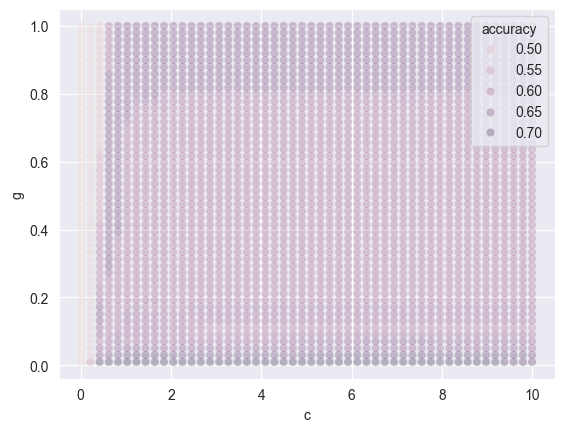

In [14]:
from tqdm import tqdm
import random

CVALUES = np.linspace(0.01, 10, 50)
GVALUES = np.linspace(0.01, 1, 10)

cArr = []
gArr = []
aArr = []
accuracy_scores = pd.DataFrame()

for c in tqdm(CVALUES):
    for g in GVALUES:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

        model = SVC(kernel='rbf', C = c, gamma = g)
        model.fit(X_train,y_train)

        y_pred = model.predict(X_test)

        cArr.append(c)
        gArr.append(g)
        aArr.append(accuracy_score(y_test, y_pred))

df = pd.DataFrame({'c': cArr, 'g': gArr, 'accuracy': aArr})

sns.scatterplot(data = df, x = 'c', y = 'g', hue = "accuracy", alpha = 0.3)


Low Gamma values and C values from 2 to 8 seem to be our best models, with some exceptions. 

Accuracy Score:  0.97
              precision    recall  f1-score   support

       False       1.00      0.94      0.97        36
        True       0.94      1.00      0.97        31

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67


C:\Users\coleo\PycharmProjects\ds401\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


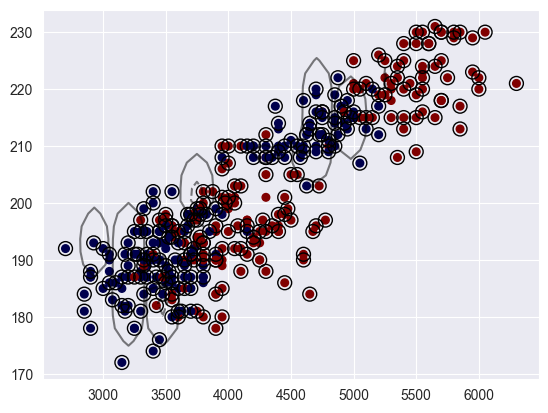

Accuracy Score:  1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        36
        True       1.00      1.00      1.00        31

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


C:\Users\coleo\PycharmProjects\ds401\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


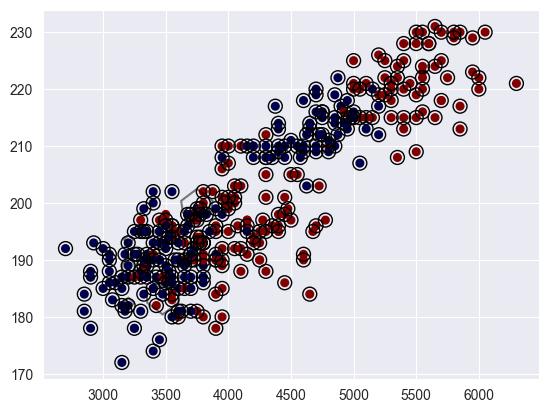

Accuracy Score:  0.94
              precision    recall  f1-score   support

       False       0.97      0.92      0.94        36
        True       0.91      0.97      0.94        31

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67


C:\Users\coleo\PycharmProjects\ds401\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


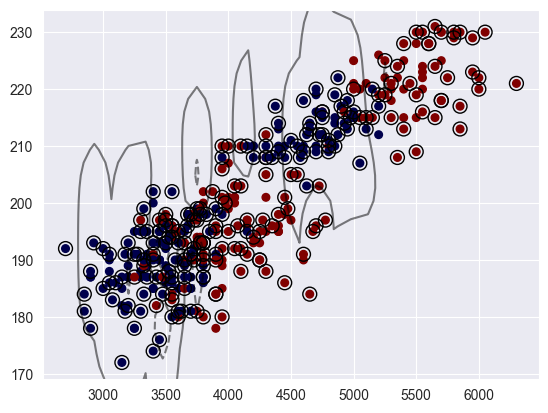

Accuracy Score:  1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        36
        True       1.00      1.00      1.00        31

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


C:\Users\coleo\PycharmProjects\ds401\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


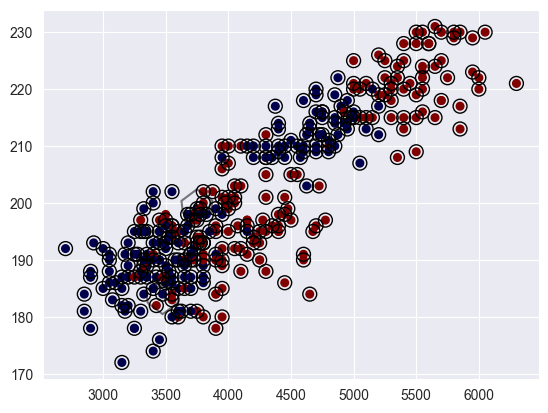

In [15]:

df = df2
X = df[['body_mass_g', 'flipper_length_mm']]
y = df['sex_MALE']

best_c = [5,2.1,7,7]
best_g =[.05,.4,.01,.5]

for element in range(len(best_c)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

    # model = SVC(kernel='linear', C = 10)
    # model.fit(X,y)

    model = SVC(kernel='rbf', C = best_c[element], gamma = best_g[element])
    model.fit(X,y)


    y_pred = model.predict(X_test)

    confusion_matrix(y_test, y_pred)
    print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))
    print(classification_report(y_test, y_pred))


    plot_svm_boundary(model, X, y)

    # model = SVC(kernel='rbf', C = 1, gamma = 'scale')
    # model.fit(X,y)
    # plot_svm_boundary(model, X, y)

    # model = SVC(kernel='linear', C = 1000)
    # model.fit(X,y)
    # plot_svm_boundary(model, X, y)


Here we can see that out of the 4 really good models we chose, 3 seem to overfit the data pretty heavily. We should use a gamma of .01 and a C value between 5 and 8 for the best non-overfitting model 

100%|██████████| 20/20 [00:10<00:00,  1.90it/s]


<Axes: xlabel='c', ylabel='g'>

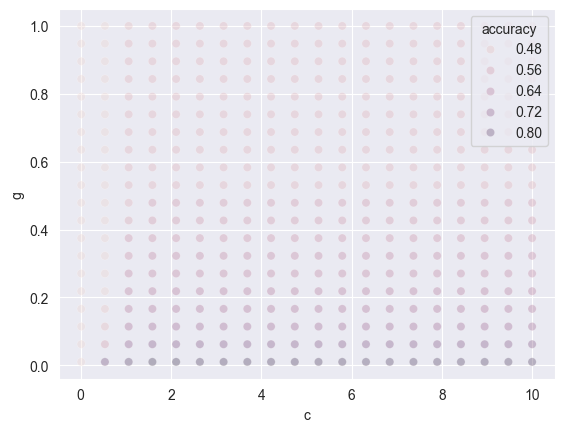

In [30]:
from tqdm import tqdm
import random

df = df3
X = pd.get_dummies(df3.drop(['species'], axis = 1), drop_first = True)
# X = df.drop("species", axis = 1)
y = df['species']


CVALUES = np.linspace(0.01, 10, 20)
GVALUES = np.linspace(0.01, 1, 20)

cArr = []
gArr = []
test = []
train = []
accuracy_scores = pd.DataFrame()

for c in tqdm(CVALUES):
    for g in GVALUES:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

        
        model = SVC(kernel='rbf', C = c, gamma = g)        
        model.fit(X_train, y_train)

        test_predictions = model.predict(X_test)
        train_predictions = model.predict(X_train)

#         confusion_matrix(y_test, test_predictions)
#         print('Accuracy Score: ', round(accuracy_score(y_test, test_predictions), 3))
#         print(confusion_matrix(y_test, test_predictions))
#         print(confusion_matrix(y_train, train_predictions))
#         print(classification_report(y_test, test_predictions))
        
        
#         y_pred = model.predict(X_test)

        cArr.append(c)
        gArr.append(g)
        train.append(accuracy_score(y_train, train_predictions))
        test.append(accuracy_score(y_test, test_predictions))

df = pd.DataFrame({'c': cArr, 'g': gArr, 'accuracy': aArr})

sns.scatterplot(data = df, x = 'c', y = 'g', hue = "accuracy", alpha = 0.3)


In [31]:
best_one = max(enumerate(test),key=lambda x: x[1])[0]
print(f"Best Test Accuracy: {test[best_one]} ")
print(f"Best Train Accuracy: {train[best_one]} ")

print(f"Best C: {cArr[best_one]} ")
print(f"Best Gamma: {gArr[best_one]} ")


Best Test Accuracy: 0.8656716417910447 
Best Train Accuracy: 0.9887218045112782 
Best C: 1.5873684210526318 
Best Gamma: 0.01 


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

        
model = SVC(kernel='rbf', C = cArr[best_one], gamma = gArr[best_one])        
model.fit(X_train, y_train)

test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

confusion_matrix(y_test, test_predictions)
print('Accuracy Score: ', round(accuracy_score(y_test, test_predictions), 3))
print(confusion_matrix(y_test, test_predictions))
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_test, test_predictions))

Accuracy Score:  0.866
[[27  1  1]
 [ 4  8  1]
 [ 2  0 23]]
[[117   0   0]
 [  3  52   0]
 [  0   0  94]]
              precision    recall  f1-score   support

      Adelie       0.82      0.93      0.87        29
   Chinstrap       0.89      0.62      0.73        13
      Gentoo       0.92      0.92      0.92        25

    accuracy                           0.87        67
   macro avg       0.88      0.82      0.84        67
weighted avg       0.87      0.87      0.86        67


## Accuracy Metrics

We do not have an easily viewable equation so we must use precision, recall and F-1 scores for our classification metrics. In this case the testing accuracy of .94 for gender and .87 for species are much higher than our other classification models. All of the same metrics as other classification models should be used.

## Graphics

See the code above

# Decision Trees

In your explanation for decision trees, be sure to describe how the decisions are 
made and how those differ for classification vs. regression.


o This one will also require multiple examples. 


o Provide a classification example for species, including all of the other predictors. 
Demonstrate a tree of max depth 3 and a higher depth tree. Include visuals for 
both using plot_tree.


o Provide a regression example for culmen depth, including all of the other 
predictors. Again, provide a tree of max depth 3 and higher depth tree, with 
visuals for both

## How it works

Decision trees are a visual method for classification and regression. They work by recursively splitting the dataset into smaller and smaller groups based on different values. Each split attempts to make the resulting smaller groups more homogenous (i.e. after 3 splits we may be able to split all penguins of one species based on beak length, island, and body mass). The splits create a tree-like structure where the leaves represent the final predictions, either a class (for classification) or a value (for regression). Decision trees are easy to interpret because you can follow the series of questions or rules from the root to a leaf. Make sure if you make a decision tree you specify a max depth though, because it is possible to get 100% accuracy with training data by eventually splitting each leaf to a certain data point. This would not be a good model because it would overfit the train data. 

## Code to implement

100%|██████████| 19/19 [00:00<00:00, 138.40it/s]
C:\Users\coleo\AppData\Local\Temp\ipykernel_13036\2552827044.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


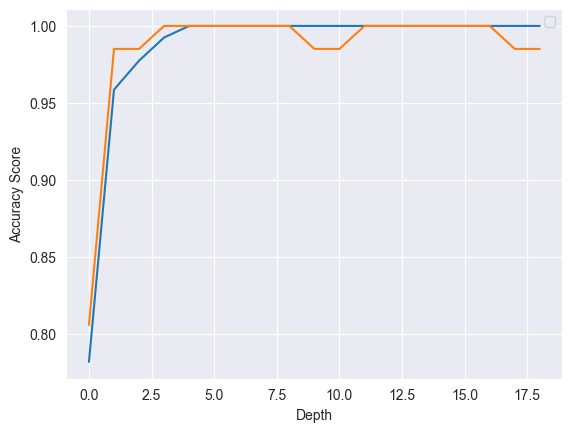

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 


X = pd.get_dummies(df3.drop(['species'], axis = 1), drop_first = True)
y = df3['species']

train = []
test = []

for depth in tqdm(range(1,20)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)

    y_pred_test = model.predict(X_test)
    train.append(accuracy_score(y_train, y_pred_train))
    test.append(accuracy_score(y_test, y_pred_test))
plt.plot(train)
plt.plot(test)
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()
# confusion_matrix(y_test, y_pred)
# print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))
# print(classification_report(y_test, y_pred))

[Text(0.5, 0.8333333333333334, 'flipper_length_mm <= 206.5\ngini = 0.64\nsamples = 266\nvalue = [115, 55, 96]\nclass = Adelie'),
 Text(0.25, 0.5, 'culmen_length_mm <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]\nclass = Adelie'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.068\nsamples = 113\nvalue = [109, 4, 0]\nclass = Adelie'),
 Text(0.375, 0.16666666666666666, 'gini = 0.18\nsamples = 51\nvalue = [4, 46, 1]\nclass = Gentoo'),
 Text(0.75, 0.5, 'culmen_depth_mm <= 17.65\ngini = 0.13\nsamples = 102\nvalue = [2, 5, 95]\nclass = Chinstrap'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 95\nvalue = [0, 0, 95]\nclass = Chinstrap'),
 Text(0.875, 0.16666666666666666, 'gini = 0.408\nsamples = 7\nvalue = [2, 5, 0]\nclass = Gentoo')]

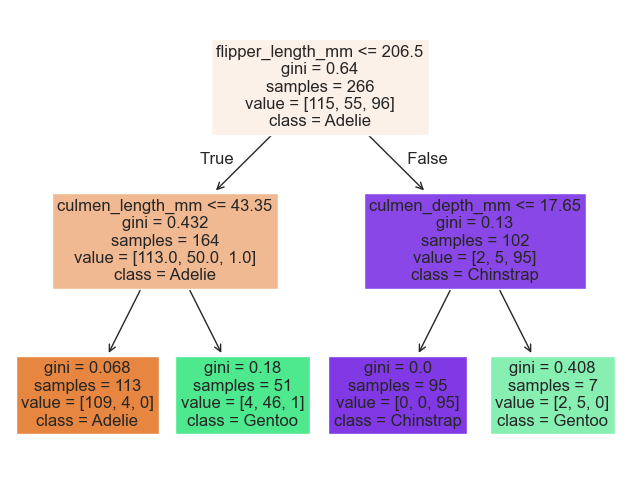

In [47]:
from sklearn.tree import plot_tree
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train, y_train)
classNames = ['Adelie', 'Gentoo', 'Chinstrap']
plt.figure(figsize = [8,6])
plot_tree(model, filled = True, feature_names = X.columns.tolist(), class_names = classNames, fontsize = 12)

[Text(0.5416666666666666, 0.875, 'flipper_length_mm <= 206.5\ngini = 0.64\nsamples = 266\nvalue = [115, 55, 96]\nclass = Adelie'),
 Text(0.3333333333333333, 0.625, 'culmen_length_mm <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]\nclass = Adelie'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'culmen_length_mm <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]\nclass = Adelie'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]\nclass = Adelie'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]\nclass = Adelie'),
 Text(0.5, 0.375, 'island_Dream <= 0.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]\nclass = Gentoo'),
 Text(0.4166666666666667, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 0, 1]\nclass = Adelie'),
 Text(0.5833333333333334, 0.125, 'gini = 0.042\nsamples = 47\nvalue = [1, 46, 0]\nclass = Gentoo'),
 Text(0.75, 0.625, 'culmen_depth_mm <= 17.65\ngini = 0.13\nsamples = 102\nvalue = 

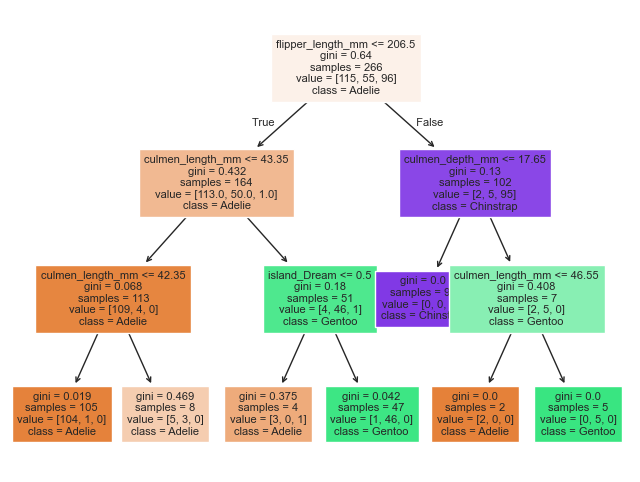

In [43]:
from sklearn.tree import plot_tree
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
classNames = ['Adelie', 'Gentoo', 'Chinstrap']
plt.figure(figsize = [8,6])
plot_tree(model, filled = True, feature_names = X.columns.tolist(), class_names = classNames, fontsize = 8)

For classifying species it does not matter much what depth is used for the decision tree. When you make a tree with a max depth of 3 it is 100% accurate for testing, the same can be said for most trees greater than a depth of 3.

100%|██████████| 19/19 [00:00<00:00, 117.81it/s]


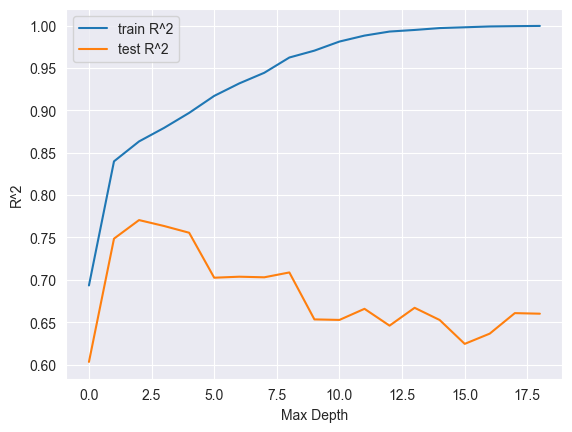

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import statsmodels.api as sm


X = df2.drop("culmen_depth_mm", axis = 1)
y = df2["culmen_depth_mm"]
train = []
test = []
trainr2 = []
testr2 = []

for depth in tqdm(range(1,20)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)
#     print('intercept=', model.intercept_)
#     print(pd.DataFrame(model.coef_, columns=['Coefficient']))
    MAE = mean_absolute_error(y_test, test_predictions)
    MSE = mean_squared_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)
    RMSE = np.sqrt(MSE)
#     print('Testing: MAE=', MAE, ', MSE=', MSE, ', RMSE=', RMSE, 'R^2', r2)
    MAE_train = mean_absolute_error(y_train, train_predictions)
    MSE_train = mean_squared_error(y_train, train_predictions)
    r2_train = r2_score(y_train, train_predictions)
    RMSE_train = np.sqrt(MSE_train)
    train.append(RMSE_train)
    test.append(RMSE)
    trainr2.append(r2_train)
    testr2.append(r2)
    
    
# plt.plot(train, label='train')
# plt.plot(test, label='test')
# plt.xlabel("Max Depth")
# plt.ylabel("RMSE")
# plt.legend()


plt.plot(trainr2, label='train R^2')
plt.plot(testr2, label='test R^2')
plt.xlabel("Max Depth")
plt.ylabel("R^2")
plt.legend()
# confusion_matrix(y_test, y_pred)
# print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))
# print(classification_report(y_test, y_pred))

[Text(0.5, 0.8333333333333334, 'species_Gentoo <= 0.5\nsquared_error = 3.908\nsamples = 266\nvalue = 17.161'),
 Text(0.25, 0.5, 'sex_MALE <= 0.5\nsquared_error = 1.373\nsamples = 170\nvalue = 18.398'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.652\nsamples = 82\nvalue = 17.585'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.855\nsamples = 88\nvalue = 19.156'),
 Text(0.75, 0.5, 'sex_MALE <= 0.5\nsquared_error = 0.89\nsamples = 96\nvalue = 14.971'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.289\nsamples = 46\nvalue = 14.237'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.491\nsamples = 50\nvalue = 15.646')]

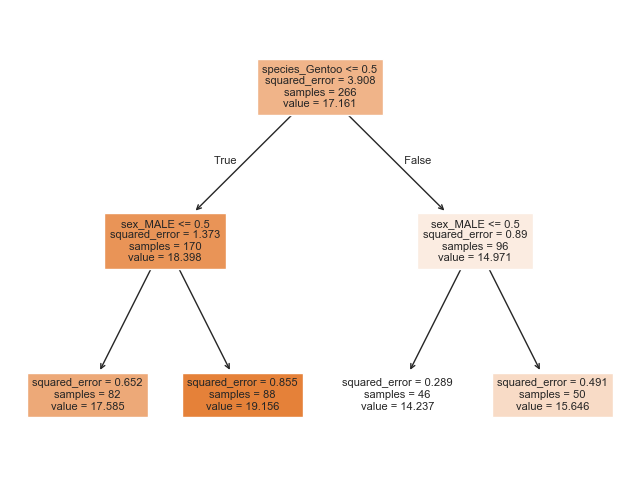

In [53]:
from sklearn.tree import plot_tree
model = DecisionTreeRegressor(max_depth = 2)
model.fit(X_train, y_train)
# classNames = ['Adelie', 'Gentoo', 'Chinstrap']
plt.figure(figsize = [8,6])
plot_tree(model, filled = True, feature_names = X.columns.tolist(), fontsize = 8)

[Text(0.5, 0.875, 'species_Gentoo <= 0.5\nsquared_error = 3.908\nsamples = 266\nvalue = 17.161'),
 Text(0.25, 0.625, 'sex_MALE <= 0.5\nsquared_error = 1.373\nsamples = 170\nvalue = 18.398'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'body_mass_g <= 3087.5\nsquared_error = 0.652\nsamples = 82\nvalue = 17.585'),
 Text(0.0625, 0.125, 'squared_error = 0.671\nsamples = 12\nvalue = 16.833'),
 Text(0.1875, 0.125, 'squared_error = 0.535\nsamples = 70\nvalue = 17.714'),
 Text(0.375, 0.375, 'flipper_length_mm <= 187.5\nsquared_error = 0.855\nsamples = 88\nvalue = 19.156'),
 Text(0.3125, 0.125, 'squared_error = 0.393\nsamples = 15\nvalue = 18.507'),
 Text(0.4375, 0.125, 'squared_error = 0.845\nsamples = 73\nvalue = 19.289'),
 Text(0.75, 0.625, 'sex_MALE <= 0.5\nsquared_error = 0.89\nsamples = 96\nvalue = 14.971'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'body_mass_g <= 4675.0\nsquared_error = 0.289\nsamples = 46\nvalue = 14.237'),
 Text(0.5625, 0.125, 'squared_error = 0.175\nsa

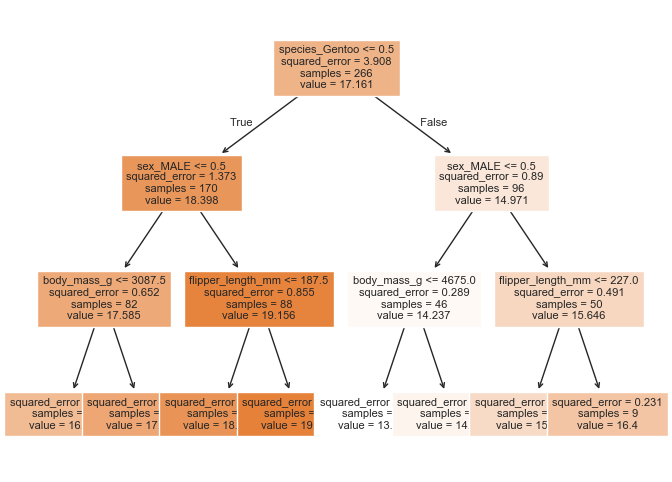

In [51]:
from sklearn.tree import plot_tree
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)
# classNames = ['Adelie', 'Gentoo', 'Chinstrap']
plt.figure(figsize = [8,6])
plot_tree(model, filled = True, feature_names = X.columns.tolist(), fontsize = 8)

We can see that a max depth of 3 is actually better than a larger max depth for our testing R^2. Obviously train will increase to 100% accuracy but these models are overfitting the data. Especially with such small datasets like penguins it is necessary to use smaller tree depths

## Accuracy Metrics

We use all of the same metrics as other classification and regression models. For classification we are focused on accuracy and confusion matrices. For regression we are focused on the RMSE and R^2 of the model. 

## Graphics

See the above plots